- 참고 기사 : 신사업·기술 자유롭게 시험…'창업의 섬'으로 떠오른 제주 (한국경제)
    - https://www.hankyung.com/it/article/202211150859i

- 통계청 자료 : 지역별 창업기업수
    - https://kosis.kr/statHtml/statHtml.do?tblId=DT_142N_F204&orgId=142&language=kor&conn_path=&vw_cd=&list_id=

### 라이브러리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 그래프 한글폰트 출력을 위한 코드
def get_font_family():
    '''
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    '''
    import platform
    system_name = platform.system()
    # mac OS 일때
    if system_name == 'Darwin' :
        font_faimly = 'AppleGothic'
    # 윈도우일떄 
    elif system_name == 'Windows':
        font_family = 'Malgun Gothic'
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = 'NanumBarunGothic'

    return font_family

# style 설정은 꼭 폰트설정 위에서 한다. 
# style에 폰트 설정이 들어있으면 한글폰트가 초기화 되어 깨진다.
# plt.style.use('seaborn')

#폰트설정
plt.rc('font', family=get_font_family())

#마이너스폰트 설정
plt.rc('axes', unicode_minus=False)

# 그래프에 retina display 적용
# 그래프 해상도 
from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina')
%config InlineBackend.figure_format = 'retina'

### 데이터셋 로드 

In [3]:
# 데이터셋 출처 : 통계청 (지역별 창업기업수)
df = pd.read_csv('./dataset.csv', encoding='cp949')
df.head()

,지역별(1),시점,항목,데이터
0,전국,2017,전체,1256267
1,전국,2017,법인,97549
2,전국,2017,개인,1158718
3,전국,2018,전체,1344366
4,전국,2018,법인,102372


In [4]:
# 컬럼확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역별(1)  270 non-null    object
 1   시점      270 non-null    int64 
 2   항목      270 non-null    object
 3   데이터     270 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 8.6+ KB


In [5]:
# 컬럼명 변경
df = df.rename(columns={'지역별(1)':'지역', '데이터':'창업기업수(개)'})
df.head()

,지역,시점,항목,창업기업수(개)
0,전국,2017,전체,1256267
1,전국,2017,법인,97549
2,전국,2017,개인,1158718
3,전국,2018,전체,1344366
4,전국,2018,법인,102372


In [6]:
# 시점 dtype 변경
df['시점'] = df['시점'].astype(str)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        270 non-null    object
 1   시점        270 non-null    object
 2   항목        270 non-null    object
 3   창업기업수(개)  270 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 8.6+ KB


### 시각화 및 분석

In [8]:
# 최근 5개년 창업기업수 상위 5개 지역
# 법인만 추출 & 전국 데이터 제거
cond = (df['항목']=='법인') & ~(df['지역']=='전국')
df_flt = df[cond]
df_flt.groupby('지역')['창업기업수(개)'].sum().nlargest(5).reset_index()

,지역,창업기업수(개)
0,서울,166461
1,경기,150187
2,부산,27466
3,인천,24798
4,경남,21706


1. 제주도 년도별 창업기업 수
    - 신문과 동일한 그래프 생성
   
   
2. 제주 + 3개 지역 년도별 창업기업 수 
    - 3개 지역 선정기준 : 최근 5개년 창업기업수 상위
    - 서울, 경기지역의 수치가 독보적으로 높다.
    - 경기지역 급속도로 성장
        - 2020년 서울을 추월 
    - 서울, 부산지역 꾸준히 성장
    
      
3. 4개 지역의 전년대비 창업기업수 증감율
    - 경기도 2020년 정점으로 성장세 완만해짐
    - 제주도 2019년부터 급속도로 성장 중

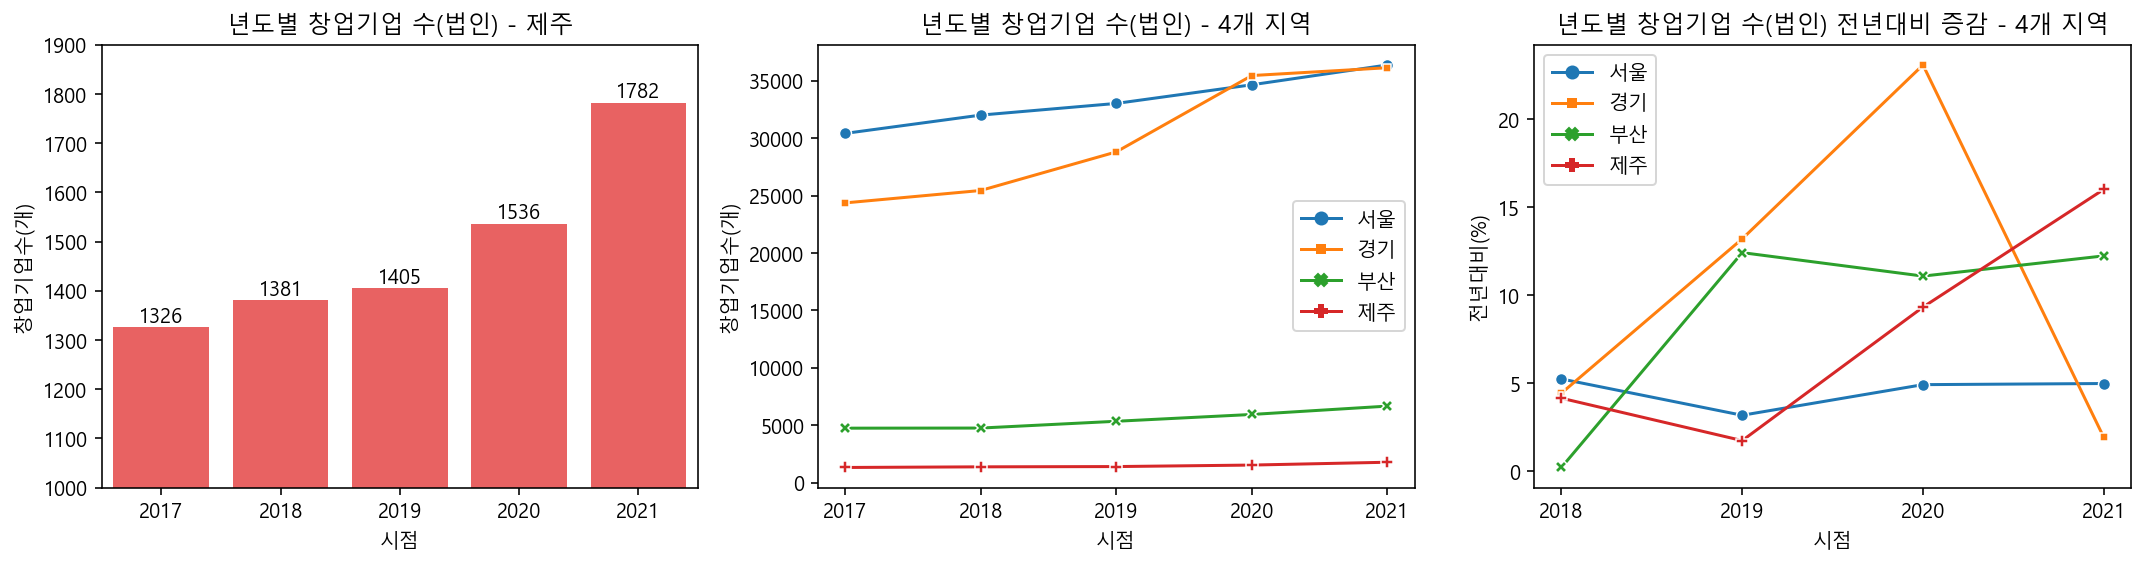

In [9]:
# 그래프
fig, ax = plt.subplots(1,3, figsize=(15,4))

## ax[0] - 제주도 년도별 창업기업수
# 데이터셋 준비
df_pub = df[df['항목']=='법인']
arr = ['제주']
df_pub_jeju = df_pub[df_pub['지역'].isin(arr)]
df_v = df_pub_jeju

# 시각화
sns.barplot(x='시점', y='창업기업수(개)', data=df_v, 
            color='r', alpha=0.7, ax=ax[0] )
ax[0].set(ylim = (1000,1900))
ax[0].title.set_text('년도별 창업기업 수(법인) - 제주')
ax[0].bar_label(ax[0].containers[0])


## ax[1] - 4개지역 년도별 창업기업수
# 데이터셋 준비
arr = ['서울','경기','부산','제주']
df_pub_4 = df_pub[df_pub['지역'].isin(arr)]
df_v = df_pub_4

# 시각화 
sns.lineplot(x='시점', y='창업기업수(개)', data=df_v,
             hue='지역', hue_order=['서울','경기','부산','제주'],
             style='지역', markers=True, dashes=False, ax=ax[1])
ax[1].legend(loc=('center right'))
ax[1].title.set_text('년도별 창업기업 수(법인) - 4개 지역')


## ax[2] - 전년대비 창업기업수 증감율 컬럼 생성 - pct_change()
# 데이터셋 준비
df_pub_4_pct_change = df_pub_4.copy()
df_pub_4_pct_change['전년대비(%)'] = df_pub_4_pct_change['창업기업수(개)'].pct_change()*100

cond = df_pub_4_pct_change['시점']=='2017'
drop_idx = df_pub_4_pct_change[cond].index
df_pub_4_pct_change = df_pub_4_pct_change.drop(drop_idx, axis=0)\
                                        .reset_index(drop=True) 
df_v = df_pub_4_pct_change

# 시각화
sns.lineplot(x='시점', y='전년대비(%)', data=df_v,
             hue='지역', hue_order=['서울','경기','부산','제주'],
             style='지역', markers=True, dashes=False, ax=ax[2])
ax[2].legend(loc='upper left')
ax[2].title.set_text('년도별 창업기업 수(법인) 전년대비 증감 - 4개 지역')


plt.tight_layout()
plt.show()

### CAGR 추가 (Compound Annual Growth Rate)
- 공식 
    - ((마지막 년도의 값 / 첫 년도의 값) ** (1 /기간) - 1) * 100

In [10]:
# 데이터셋 준비
df_cagr = df_flt.reset_index(drop=True).drop('항목',axis=1)

df_cagr.head()

,지역,시점,창업기업수(개)
0,서울,2017,30412
1,서울,2018,32006
2,서울,2019,33023
3,서울,2020,34647
4,서울,2021,36373


In [14]:
# 크로스탭 생성 : 지역vs시점
ct = pd.crosstab(index = df_cagr['지역'], columns = df_cagr['시점'], 
                 values = df_cagr['창업기업수(개)'], aggfunc='sum')\
        .sort_values('2017', ascending=False)
ct

시점,2017,2018,2019,2020,2021
지역,,,,,
서울,30412,32006,33023,34647,36373
경기,24362,25442,28801,35450,36132
부산,4748,4758,5349,5942,6669
인천,4048,4446,4886,5542,5876
경남,3925,3965,4312,4600,4904
경북,3713,3836,3934,4134,4076
충남,3617,3536,3847,4495,4668
전남,3338,3901,3873,3947,3873
광주,3302,3696,3612,4016,3705


In [12]:
# CAGR 컬럼 생성
ct['CAGR(%)'] = ((ct['2021']/ct['2017']) ** (1/ (2021-2017)) - 1) * 100

- 4개 지역 중, 2020 -> 2021 년 성장률은 제주도가 가장 높았는데
- CAGR기준으로 보면 
    - 경기 -> 부산 -> 제주 -> 서울 순서
- 그래도 제주도의 CAGR이 전국 기준 상위권이다.
- CAGR 자체의 의미를 조금 더 공부해야겠다.

In [13]:
# 전국 CAGR median index 생성 및 백그라운드 설정
ct_cagr_sorted = ct.sort_values('CAGR(%)', ascending=False)
ct_cagr_sorted.loc['ColMedian', :] = ct_cagr_sorted.median()
ct_cagr_sorted[['2017','2018','2019','2020','2021']] = ct_cagr_sorted[['2017','2018','2019','2020','2021']].astype(int)

ct_cagr_sorted.style.background_gradient(axis=0, gmap=ct_cagr_sorted['CAGR(%)'], cmap='RdYlGn', subset=['CAGR(%)']).format(precision=2)

시점,2017,2018,2019,2020,2021,CAGR(%)
지역,,,,,,
세종,568,582,702,827,896,12.07
경기,24362,25442,28801,35450,36132,10.36
인천,4048,4446,4886,5542,5876,9.76
부산,4748,4758,5349,5942,6669,8.86
대전,2205,2343,2698,3048,2997,7.97
제주,1326,1381,1405,1536,1782,7.67
충남,3617,3536,3847,4495,4668,6.58
대구,3017,3056,3473,3833,3888,6.55
충북,2463,2528,2618,3096,3132,6.19
